In [1]:
import os
os.environ['KERAS_BACKEND'] = 'torch'
import keras

/home/hibana2077/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load mnist dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

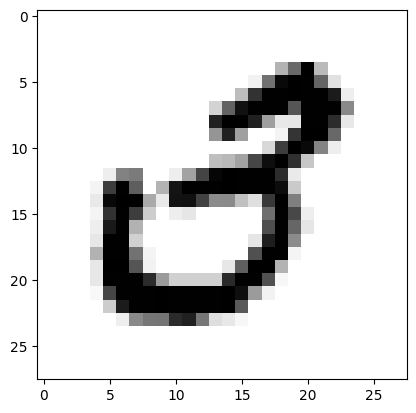

In [3]:
# random select 1 image to show
import random
import matplotlib.pyplot as plt

random_idx = random.randint(0, len(train_images))

plt.imshow(train_images[random_idx], cmap=plt.cm.binary)
plt.show()

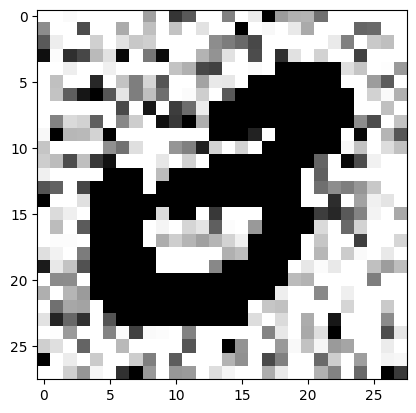

In [4]:
# add noise to selected image
import numpy as np

noise_factor = 0.5
noisy_train_images = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
noisy_test_images = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)

noisy_train_images = np.clip(noisy_train_images, 0., 1.)
noisy_test_images = np.clip(noisy_test_images, 0., 1.)

plt.imshow(noisy_train_images[random_idx], cmap=plt.cm.binary)
plt.show()

In [5]:
# define model
def build_model():

    Input_layer = keras.layers.Input(shape=(28, 28))
    
    x = keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='linear')(Input_layer)
    x = keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='linear')(x)
    x = keras.layers.MaxPooling1D(pool_size=2, padding='same')(x)

    x = keras.layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='linear')(x)
    x = keras.layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='linear')(x)
    x = keras.layers.MaxPooling1D(pool_size=2, padding='same')(x)

    x = keras.layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='linear')(x)
    x = keras.layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='linear')(x)
    x = keras.layers.MaxPooling1D(pool_size=2, padding='same')(x)

    x = keras.layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='linear')(x)
    x = keras.layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='linear')(x)
    x = keras.layers.MaxPooling1D(pool_size=2, padding='same')(x)

    x = keras.layers.Flatten()(x)

    x = keras.layers.Dense(28*28, activation='linear')(x)

    Output_layer = keras.layers.Reshape((28, 28))(x)

    model = keras.models.Model(inputs=Input_layer, outputs=Output_layer)

    opt = keras.optimizers.AdamW(learning_rate=0.001)
    loss = keras.losses.MeanAbsoluteError()

    model.compile(optimizer=opt, loss=loss)

    return model

In [6]:
# train model
model = build_model()
model.summary()

history = model.fit(noisy_train_images, train_images, epochs=15, batch_size=128, validation_split=0.2)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d (Conv1D)                 │ (None, 28, 32)            │      2,720 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1 (Conv1D)               │ (None, 28, 32)            │      3,104 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 32)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_2 (Conv1D)               │ (None, 14, 64)            │      6,208 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_3 (Conv1D)               │ (None, 14, 64)            │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7, 64)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_4 (Conv1D)               │ (None, 7, 128)            │     24,704 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_5 (Conv1D)               │ (None, 7, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 4, 128)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_6 (Conv1D)               │ (None, 4, 256)            │     98,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_7 (Conv1D)               │ (None, 4, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 2, 256)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 784)               │    402,192 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ reshape (Reshape)               │ (None, 28, 28)            │          0 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 795,984 (3.04 MB)

 Trainable params: 795,984 (3.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 30.2235 - val_loss: 21.1669
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - loss: 19.8253 - val_loss: 17.0692
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 16.5873 - val_loss: 15.3174
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 15.0001 - val_loss: 14.1825
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 13.9528 - val_loss: 13.3801
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 13.1750 - val_loss: 12.8399
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 12.6740 - val_loss: 12.4109
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 12.2568 - val_loss: 12.0696
Epoch 9/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 11.9539 - val_loss: 11.8481
Epoch 10/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 11.6910 - val_loss: 11.5987
Epoch 11/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 11.5130 - val_loss: 11.4085
Epoch 12

In [7]:
# predict

predict = model.predict(noisy_test_images)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


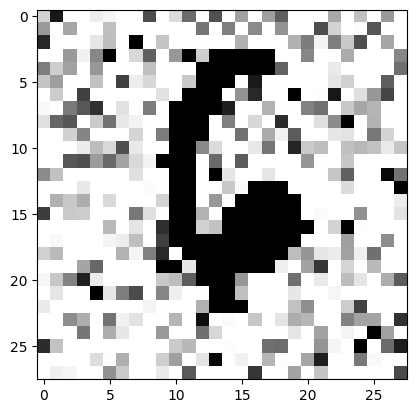

In [23]:
random_idx = random.randint(0, len(test_images))

plt.imshow(noisy_test_images[random_idx], cmap=plt.cm.binary)
plt.show()

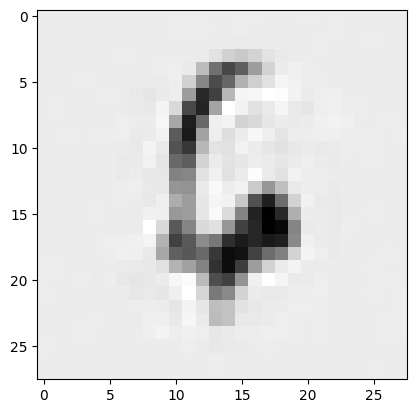

In [24]:
plt.imshow(predict[random_idx], cmap=plt.cm.binary)
plt.show()

In [10]:
# save model

model.save('mnist_upscale_2.keras')